In [7]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def read_chunks(file, cols=None, city=None, chunk_size=500000):
    df = pd.read_json(path_or_buf=file, chunksize=chunk_size, lines=True)

    chunk_list = []
    for chunk in tqdm(df, desc=file):
        if city:
            chunk = chunk[chunk['city'] == city]
        if cols is None:
            chunk_list.append(chunk)
        else:
            chunk_list.append(chunk[cols])
    
    return pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [3]:
city_of_interest = 'Indianapolis'

business_data = read_chunks('../yelp_dataset/yelp_academic_dataset_business.json', city=city_of_interest)
business_ids = business_data['business_id'].unique()

review_data = read_chunks('../yelp_dataset/yelp_academic_dataset_review.json')
review_data = review_data[review_data['business_id'].isin(business_ids)]

tip_data = read_chunks('../yelp_dataset/yelp_academic_dataset_tip.json')
tip_data = tip_data[tip_data['business_id'].isin(business_ids)]

df = read_chunks('../yelp_dataset/yelp_academic_dataset_user.json')
users_of_interest = set(review_data['user_id']).union(set(tip_data['user_id']))
df = df[df['user_id'].isin(users_of_interest)]

../yelp_dataset/yelp_academic_dataset_business.json: 0it [00:00, ?it/s]

../yelp_dataset/yelp_academic_dataset_review.json: 0it [00:00, ?it/s]

../yelp_dataset/yelp_academic_dataset_tip.json: 0it [00:00, ?it/s]

../yelp_dataset/yelp_academic_dataset_user.json: 0it [00:00, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106971 entries, 6 to 1987886
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             106971 non-null  object 
 1   name                106971 non-null  object 
 2   review_count        106971 non-null  int64  
 3   yelping_since       106971 non-null  object 
 4   useful              106971 non-null  int64  
 5   funny               106971 non-null  int64  
 6   cool                106971 non-null  int64  
 7   elite               106971 non-null  object 
 8   friends             106971 non-null  object 
 9   fans                106971 non-null  int64  
 10  average_stars       106971 non-null  float64
 11  compliment_hot      106971 non-null  int64  
 12  compliment_more     106971 non-null  int64  
 13  compliment_profile  106971 non-null  int64  
 14  compliment_cute     106971 non-null  int64  
 15  compliment_list     106971 non-null  i

In [5]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
7,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
23,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
35,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,71,21,19,,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",1,...,0,0,0,0,1,3,0,0,0,0
39,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,26,24,83,23,229,570,528,528,118,50


In [6]:
df.duplicated().sum()

0

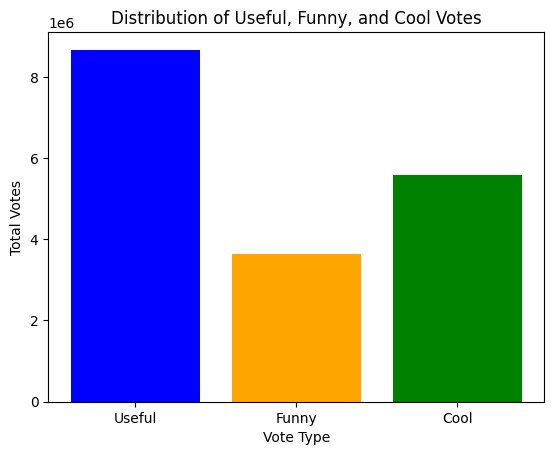

In [15]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

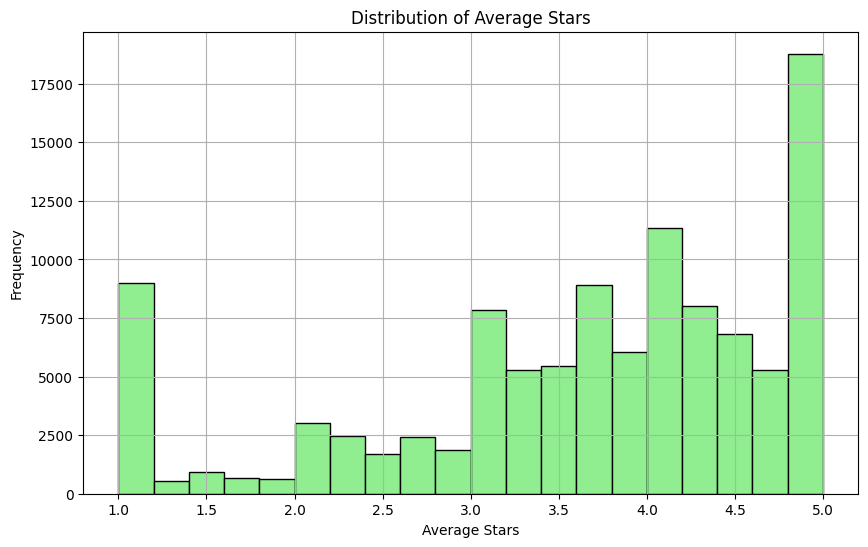

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['average_stars'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stars')
plt.grid(True)
plt.show()

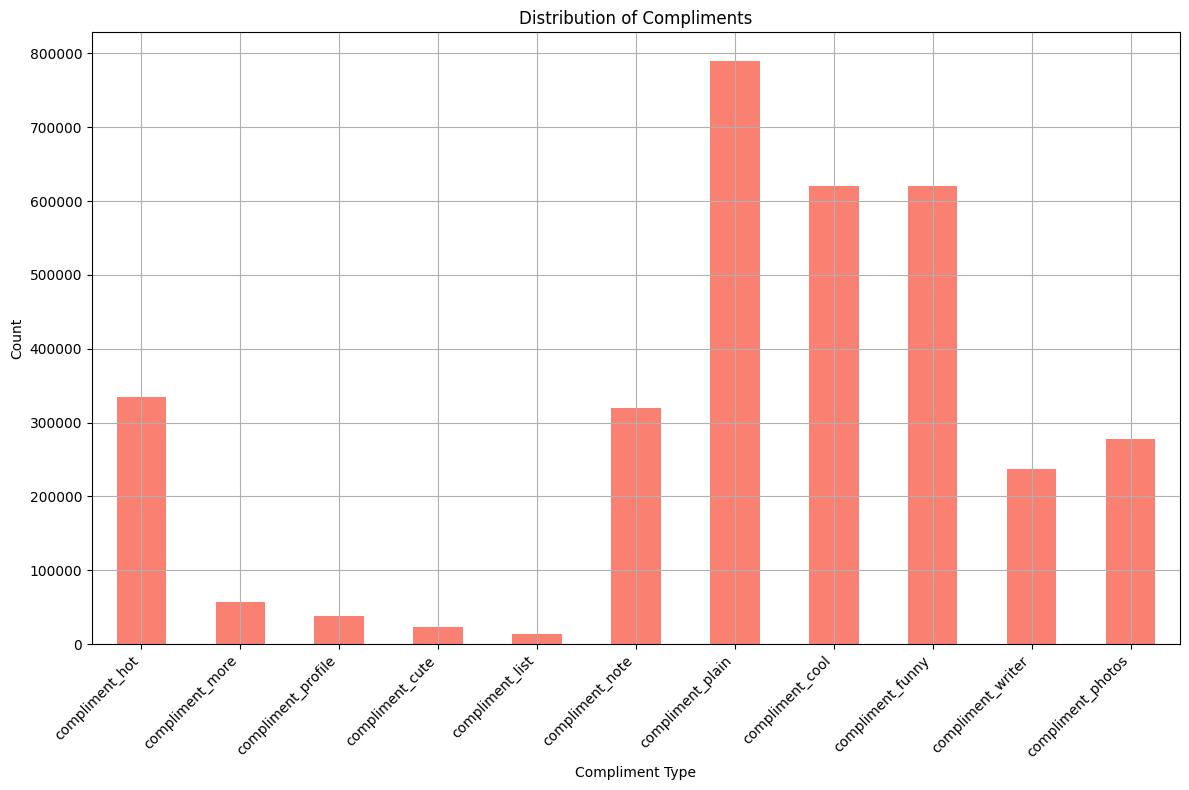

In [21]:
compliment_cols = [col for col in df.columns if 'compliment' in col]
total_compliments = df[compliment_cols].sum()

plt.figure(figsize=(12, 8))
total_compliments.plot(kind='bar', color='salmon')
plt.xlabel('Compliment Type')
plt.ylabel('Count')
plt.title('Distribution of Compliments')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

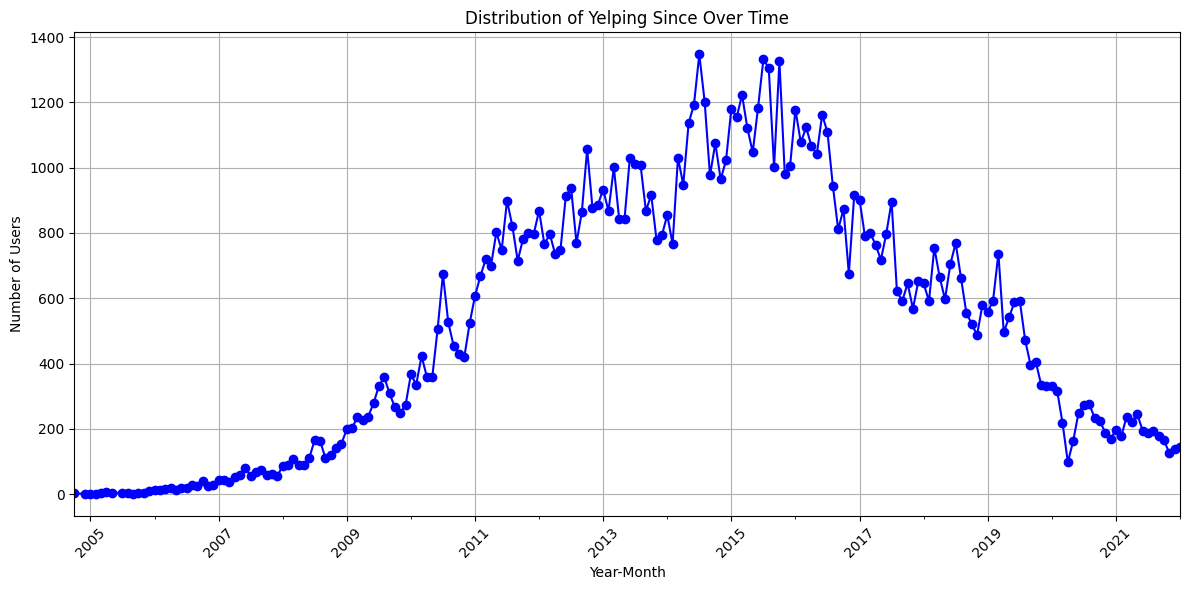

In [27]:
df['yelping_since'] = pd.to_datetime(df['yelping_since'])
yelping_counts = df.groupby(df['yelping_since'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
yelping_counts.plot(color='blue', marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Yelping Since Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

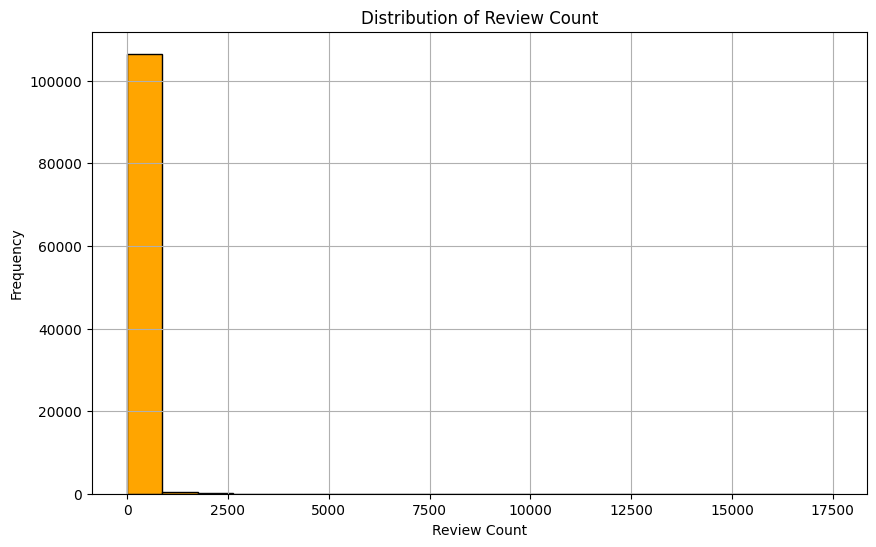

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['review_count'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')
plt.grid(True)
plt.show()

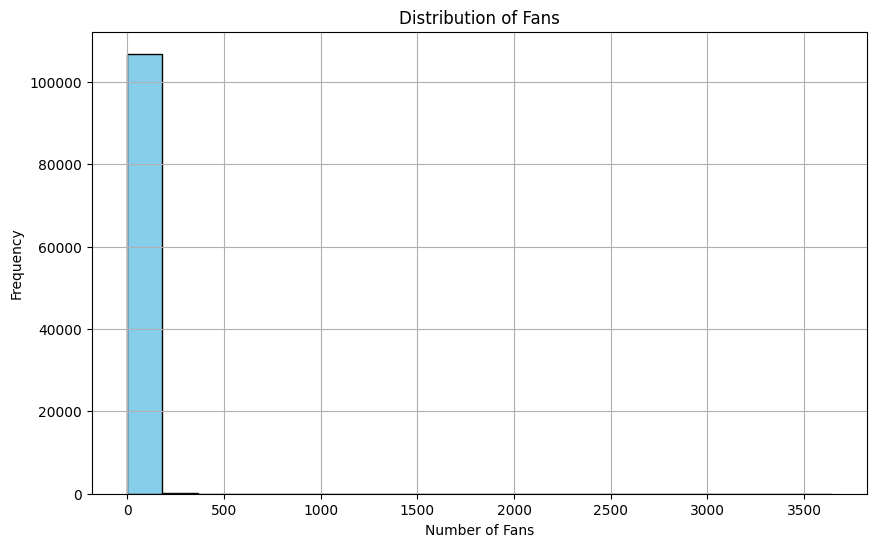

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['fans'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Distribution of Fans')
plt.grid(True)
plt.show()

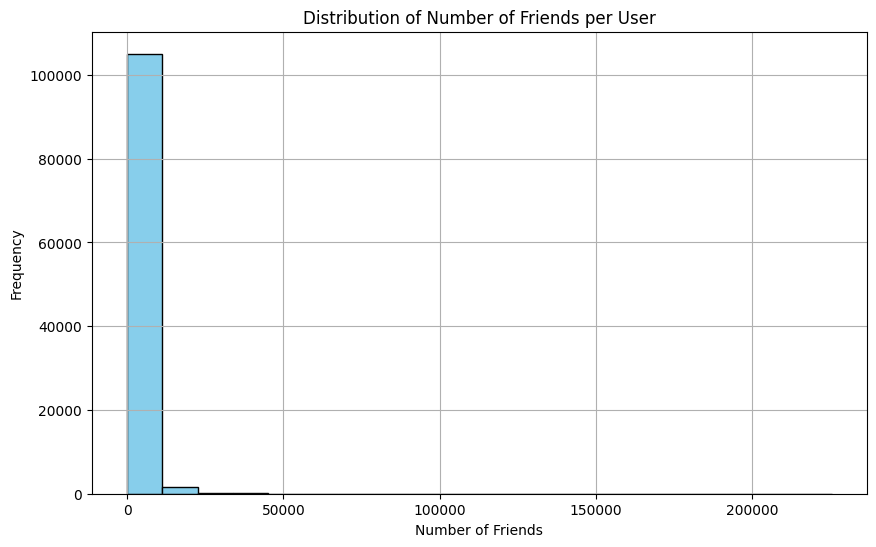

In [26]:
df['num_friends'] = df['friends'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['num_friends'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Friends per User')
plt.grid(True)
plt.show()